In [1]:
#   import necessary dependencies
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, fowlkes_mallows_score
from sklearn.cluster import AffinityPropagation

print("dependencies imported")

dependencies imported


In [2]:
#   load the data and pca it
digits = datasets.load_digits()

thing = pd.DataFrame(digits.target)
pca = PCA(n_components=2)

data = StandardScaler().fit_transform(digits.data)
principalData = pca.fit_transform(data)

print(principalData)

[[ 1.91421076 -0.95447642]
 [ 0.58898684  0.92456644]
 [ 1.30204135 -0.31721433]
 ...
 [ 1.02260626 -0.1480341 ]
 [ 1.07605708 -0.38093144]
 [-1.25769907 -2.22762532]]


In [26]:
afprop = AffinityPropagation(damping=0.6, affinity='euclidean', verbose=True).fit(principalData)
cluster_centers_indices = afprop.cluster_centers_indices_
labels = afprop.labels_
n_clusters = len(cluster_centers_indices)

Converged after 94 iterations.


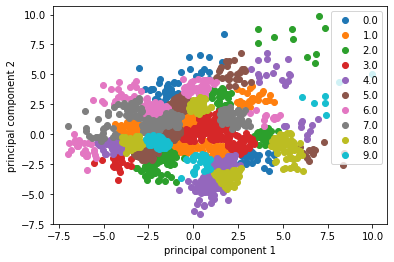

Confusion Matrix:
[[ 11  39   3  38  52   0   0   0  14  21]
 [  0  47  34  51   1   1   1  39   7   1]
 [  0  19   4  22  24  19  31  27  25   6]
 [ 11  30   6   1  11  16  25  47  17  19]
 [ 11   1  37  19  10  13  12   6  65   7]
 [  8  27   9  27   0  23  26  47   3  12]
 [  0   5   0   2 123   0   0   0  49   2]
 [ 22   9  19   5  10  44  42   7  21   0]
 [  0  41   4  43   1  24  12  29  10  10]
 [  1  42  19  18   6  31  11  24  10  18]]
Fowlkes-Mallows Score:
0.19317745499905928


In [37]:
arr = labels
start = 0
end = 9
width = end - start
res = (arr - arr.min())/arr.ptp() * width + start

#normalized the labels in an attempt to make some sense of the clusters
normalizedLabels = np.rint(res)
# print(res)
# print(normalizedLabels)

df = pd.DataFrame(data=principalData, columns=['x', 'y'])
df.insert(2, 'label', normalizedLabels)

groups = df.groupby('label')
for name, group in groups:
    plt.plot(group['x'], group['y'], marker='o', linestyle='', label=name)

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()
plt.close()

print("Confusion Matrix:")
print(confusion_matrix(digits.target, normalizedLabels))
print("Fowlkes-Mallows Score:")
print(fowlkes_mallows_score(digits.target, normalizedLabels))